In [9]:
%matplotlib inline

import numpy as np
from scipy.io import loadmat, savemat

from fooof import FOOOFGroup

In [24]:
# Load the mat file 
dat = loadmat('power_spectra.mat')

# Unpack data from dictioanry, and squeeze into numpy arrays
freqs = np.squeeze(dat['freqs'])
psds = np.squeeze(dat['psds'])

# Transpose power spectra, to have the expected orientation for FOOOF
psds = psds.T  

In [25]:
# Initialize FOOOF object
fg = FOOOFGroup()


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.98 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is freq-res)
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                       FOOOF - GROUP RESULTS                                      
                                                                                                  
                             Number of power spectra in the Group: 2                              
                                                                                                  
                        The model was run on the frequency range 1 - 50 Hz                        
                                 Frequency Resolution is 0.98 Hz       

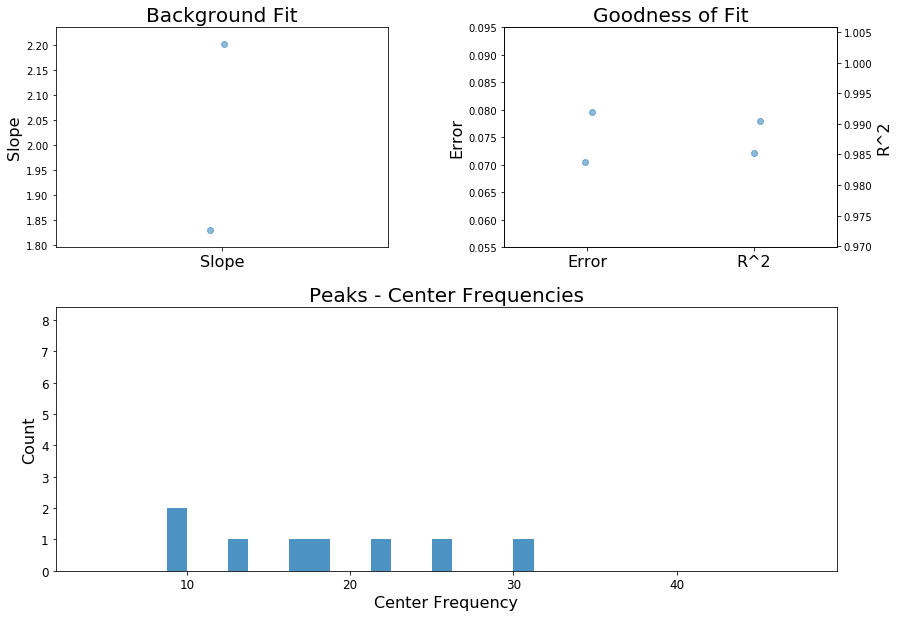

In [26]:
# Fit the FOOOF model on all PSDs, and report
fg.report(freqs, psds, [1, 50])

In [28]:
#
sls = fg.get_all_data('background_params', 'slope')

savemat('slopes', {'slopes' : sls})

In [31]:
#
for ind, f_res in enumerate(fg):
    savemat('f_res_' + str(ind), f_res._asdict())